In [1]:
# Importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler


In [4]:
def load_dataset(txt_path, delimiter):
    df = pd.read_csv(txt_path, delimiter=delimiter, engine='python', header=None)
    print(f"Loaded {txt_path} successfully")
    return df

# Example output
df = load_dataset("train_data.txt", delimiter=' ::: ')


Loaded train_data.txt successfully


In [11]:
def check_data_quality(df):
    missing_values = df.isnull().sum()
    print("Missing values in each column:\n", missing_values)

# Example output
check_data_quality(df)
df.fillna('', inplace=True)


Missing values in each column:
 0       0
1       0
2       0
3       0
text    0
dtype: int64


In [12]:
def preprocess_data(df):
    df['text'] = df[1] + " " + df[3]  # Combining title and description
    X = df['text']
    y = df[2]  # Genre
    print("Data preprocessed successfully")
    return X, y

# Example output
X, y = preprocess_data(df)


Data preprocessed successfully


In [13]:
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Data split into training and test sets")
    return X_train, X_test, y_train, y_test

# Example output
X_train, X_test, y_train, y_test = split_data(X, y)


Data split into training and test sets


In [14]:
def vectorize_and_scale_data(X_train, X_test):
    vectorizer = TfidfVectorizer(stop_words='english')  # Remove stop words
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    scaler = StandardScaler(with_mean=False)
    X_train_scaled = scaler.fit_transform(X_train_vec)
    X_test_scaled = scaler.transform(X_test_vec)

    print("Text data vectorized and scaled successfully")
    return X_train_scaled, X_test_scaled

# Example output
X_train_scaled, X_test_scaled = vectorize_and_scale_data(X_train, X_test)


Text data vectorized and scaled successfully


In [17]:
# Checking for missing values
def check_data_quality(df):
    missing_values = df.isnull().sum()
    print("Missing values in each column:\n", missing_values)

# Check the data quality
check_data_quality(df)

# Fill missing values if found
df.fillna('', inplace=True)


Missing values in each column:
 0       0
1       0
2       0
3       0
text    0
dtype: int64


In [18]:
# Preprocess the data
def preprocess_data(df):
    df['text'] = df[1] + " " + df[3]  # Combining title and description
    X = df['text']
    y = df[2]  # Genre
    print("Data preprocessed successfully")
    return X, y

# Preprocess the data
X, y = preprocess_data(df)


Data preprocessed successfully


In [19]:
from sklearn.preprocessing import StandardScaler

# Vectorize and scale the text data
def vectorize_and_scale_data(X_train, X_test):
    vectorizer = TfidfVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    scaler = StandardScaler(with_mean=False)
    X_train_scaled = scaler.fit_transform(X_train_vec)
    X_test_scaled = scaler.transform(X_test_vec)

    print("Text data vectorized and scaled successfully")
    return X_train_scaled, X_test_scaled

# Vectorize and scale the text data
X_train_scaled, X_test_scaled = vectorize_and_scale_data(X_train, X_test)

# Vectorize and scale the text data
def vectorize_and_scale_data(X_train, X_test):
    vectorizer = TfidfVectorizer(stop_words='english')  # Remove stop words
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    scaler = StandardScaler(with_mean=False)
    X_train_scaled = scaler.fit_transform(X_train_vec)
    X_test_scaled = scaler.transform(X_test_vec)

    print("Text data vectorized and scaled successfully")
    return X_train_scaled, X_test_scaled



Text data vectorized and scaled successfully


In [20]:
# Train the hybrid model combining logistic regression and random forest
def train_hybrid_model(X_train_scaled, y_train):
    lr_model = LogisticRegression(max_iter=500)
    rf_model = RandomForestClassifier()
    hybrid_model = VotingClassifier(estimators=[('lr', lr_model), ('rf', rf_model)], voting='soft')
    hybrid_model.fit(X_train_scaled, y_train)
    print("Hybrid model trained successfully")
    return hybrid_model

# Train the hybrid model
hybrid_model = train_hybrid_model(X_train_scaled, y_train)


Hybrid model trained successfully


In [21]:
# Evaluating the model and printing accuracy
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print("Model accuracy:", accuracy)
    return y_pred

# Evaluate the model
y_pred = evaluate_model(hybrid_model, X_test_scaled, y_test)

Model accuracy: 0.5048923679060665


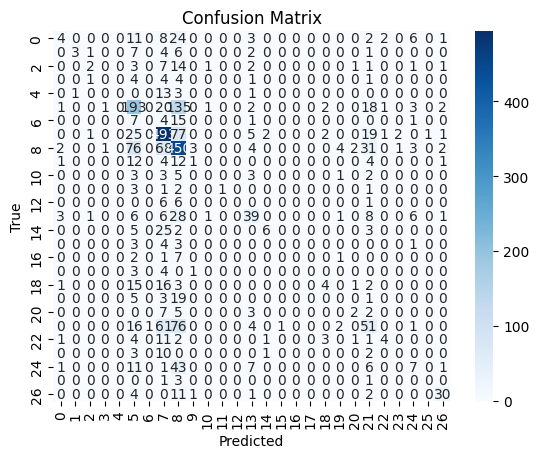

In [22]:
# Plotting a confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plotting the confusion matrix
plot_confusion_matrix(y_test, y_pred)


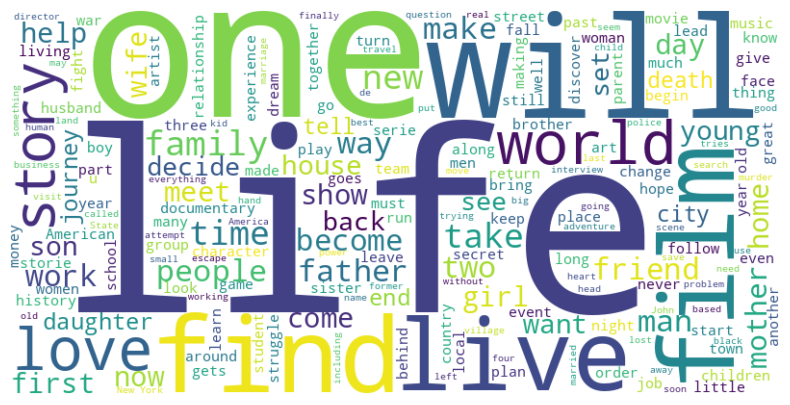

In [23]:
# Generating a word cloud
def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate the word cloud
generate_word_cloud(' '.join(X))
